In [1]:
from pyluos import Robot
from spherical_joint import Actuator
import time
import math
import numpy as np
import threading

In [2]:
r = Robot('/dev/cu.usbserial-DN05NM15')
print(r.modules)

Connected to "/dev/cu.usbserial-DN05NM15".
Sending detection signal.
Waiting for route table...
Robot setup.
-------------------------------------------------
Type                Alias               ID   
-------------------------------------------------
Gate                gate                1    
ControlledMotor     disk_top            2    
ControlledMotor     disk_middle         3    
ControlledMotor     disk_bottom         4    



### Parameters of the actuator

In [3]:
R0 = [[math.cos(30*math.pi/180),-math.sin(30*math.pi/180),0],[math.sin(30*math.pi/180),math.cos(30*math.pi/180),0],[0,0,1]]
a = Actuator([0,0,93],[0,0,73],33.5,R0)

#r.gate.delay=10
r.disk_bottom.rot_position=False
r.disk_middle.rot_position=False
r.disk_top.rot_position=False

r.disk_bottom.limit_current = 0.8
r.disk_middle.limit_current = 0.8
r.disk_top.limit_current = 0.8


###########Setup############

r.disk_bottom.encoder_res = 5
r.disk_middle.encoder_res = 5
r.disk_top.encoder_res = 5


r.disk_bottom.setToZero()
r.disk_middle.setToZero()
r.disk_top.setToZero()


r.disk_bottom.reduction = 77.35
r.disk_middle.reduction = 77.35
r.disk_top.reduction = 77.35

r.disk_bottom.limit_current = 0.8
r.disk_middle.limit_current = 0.8
r.disk_top.limit_current = 0.8

r.disk_bottom.wheel_size = 62
r.disk_middle.wheel_size = 62
r.disk_top.wheel_size = 62

r.disk_bottom.positionPid = [10,0.04,100.0]
r.disk_middle.positionPid = [10,0.04,100.0]
r.disk_top.positionPid = [10,0.04,100.0]

r.disk_bottom.rot_position_mode = True
r.disk_middle.rot_position_mode = True
r.disk_top.rot_position_mode = True

r.disk_top.rot_position = True
r.disk_middle.rot_position = True
r.disk_bottom.rot_position = True

r.disk_top.rot_speed = True
r.disk_middle.rot_speed = True
r.disk_bottom.rot_speed = True


In [7]:
#If speed must be limited

r.disk_bottom.rot_speed_mode = False
r.disk_middle.rot_speed_mode = False
r.disk_top.rot_speed_mode = False

#r.disk_bottom.target_rot_speed = 100
#r.disk_middle.target_rot_speed = 100
#r.disk_top.target_rot_speed = 100

### Compliant Mode

In [4]:
r.disk_bottom.compliant = True
r.disk_middle.compliant = True
r.disk_top.compliant = True

In [4]:
r.disk_bottom.compliant = False
r.disk_middle.compliant = False
r.disk_top.compliant = False

### Array trajectories WIP

In [5]:
pos1 = []
pos2 = []
for i in range(240):
    pos1.append(i)
for j in range(240,0,-1):
    pos2.append(j)

In [6]:
r.disk_top.sampling_freq = 200
r.disk_middle.sampling_freq = 200

In [13]:
r.disk_middle.pause()
r.disk_top.pause()

r.disk_top.target_rot_position = pos1
r.disk_top.target_rot_position = pos2
r.disk_middle.target_rot_position = pos1

In [14]:
r.disk_middle.play()
r.disk_top.play()

In [16]:
angle = 0
while angle < 180:
    r.disk_top.target_rot_position = angle
    angle += 1
    time.sleep(0.005)
r.disk_top.target_rot_position = 0

### Finds zero WIP

In [12]:
def zero3(): ###Pratique sans la tête
    r.disk_bottom.power_mode = True
    r.disk_middle.power_mode = True
    r.disk_top.power_mode = True

    r.disk_bottom.power_ratio = 0
    r.disk_middle.power_ratio = 0
    r.disk_top.power_ratio = 0

        #Bottom disk zero

    r.disk_bottom.compliant = False
    r.disk_middle.compliant = False
    r.disk_top.compliant = False

    r.disk_bottom.power_ratio = -60
    r.disk_middle.power_ratio = -60
    r.disk_top.power_ratio = -60

    
    time.sleep(1)

    r.disk_bottom.power_ratio = 0
    r.disk_middle.power_ratio = 0
    r.disk_top.power_ratio = 0
    
    r.disk_bottom.setToZero()
    r.disk_middle.setToZero()
    r.disk_top.setToZero()
    
    time.sleep(0.1)
    r.disk_bottom.rot_position_mode = True
    r.disk_middle.rot_position_mode = True
    r.disk_top.rot_position_mode = True

    r.disk_bottom.target_rot_position = 125
    r.disk_middle.target_rot_position = 45+125
    r.disk_top.target_rot_position = 90+125

    time.sleep(0.5)
    
    r.disk_bottom.setToZero()
    r.disk_middle.setToZero()
    r.disk_top.setToZero()
    
    time.sleep(0.1)
    
    q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13

In [6]:
def zero4(): ###Pour éviter de cogner la tête
    r.disk_bottom.power_mode = True
    r.disk_middle.power_mode = True
    r.disk_top.power_mode = True

    r.disk_bottom.power_ratio = 0
    r.disk_middle.power_ratio = 0
    r.disk_top.power_ratio = 0

    #Bottom disk zero

    r.disk_bottom.compliant = False
    r.disk_middle.compliant = False
    r.disk_top.compliant = False

    r.disk_bottom.power_ratio = -40
    r.disk_middle.power_ratio = -40
    r.disk_top.power_ratio = -40

    time.sleep(0.2)
    while r.disk_bottom.rot_speed != 0 :
        time.sleep(0.01)

    r.disk_bottom.power_ratio = 0
    r.disk_middle.power_ratio = 0
    r.disk_top.power_ratio = 0

    r.disk_bottom.setToZero()
    r.disk_middle.setToZero()
    r.disk_top.setToZero()
    time.sleep(0.1)

    ####

    r.disk_bottom.rot_position_mode = True
    r.disk_middle.rot_position_mode = True
    r.disk_top.rot_position_mode = True

    r.disk_bottom.target_rot_position = 125
    r.disk_middle.target_rot_position = 125
    r.disk_top.target_rot_position = 125

    time.sleep(0.5)

    r.disk_bottom.setToZero()
    r.disk_middle.setToZero()
    r.disk_top.setToZero()
    time.sleep(0.1)

    ####

    r.disk_middle.power_mode = True
    r.disk_middle.power_ratio = -40
    time.sleep(0.2)
    while r.disk_middle.rot_speed != 0:
        time.sleep(0.01)
    r.disk_middle.power_ratio = 0
    r.disk_middle.setToZero()
    time.sleep(0.1)

    ####

    r.disk_middle.rot_position_mode = True
    r.disk_top.target_rot_position= 45
    r.disk_middle.target_rot_position = 45

    time.sleep(0.5)

    r.disk_middle.setToZero()
    time.sleep(0.1)

    ####

    r.disk_bottom.target_rot_position = -40
    time.sleep(0.2)

    r.disk_top.power_mode = True
    r.disk_top.power_ratio = -40
    time.sleep(0.2)
    while r.disk_top.rot_speed != 0:
        time.sleep(0.01)
    r.disk_top.power_ratio = 0
    r.disk_top.setToZero()
    time.sleep(0.1)

    ####

    r.disk_top.rot_position_mode = True
    r.disk_top.target_rot_position = 50

    time.sleep(0.5)

    r.disk_top.setToZero()
    time.sleep(0.1)

    r.disk_bottom.target_rot_position = 0
    time.sleep(0.2)

    ####

    q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13

In [11]:
r.disk_bottom.power_mode = True
r.disk_middle.power_mode = True
r.disk_top.power_mode = True

r.disk_bottom.power_ratio = 0
r.disk_middle.power_ratio = 0
r.disk_top.power_ratio = 0

#Bottom disk zero

r.disk_bottom.compliant = False
r.disk_middle.compliant = False
r.disk_top.compliant = False

r.disk_bottom.power_ratio = -60
r.disk_middle.power_ratio = -60
r.disk_top.power_ratio = -60

time.sleep(0.3)
T = []
t = 0
speed = []
while r.disk_bottom.rot_speed != 0 :
    time.sleep(0.005)
    t+=0.005
    T.append(t)
    speed.append(r.disk_bottom.rot_speed)

r.disk_bottom.power_ratio = 0
r.disk_middle.power_ratio = 0
r.disk_top.power_ratio = 0

r.disk_bottom.setToZero()
r.disk_middle.setToZero()
r.disk_top.setToZero()
time.sleep(0.1)

In [7]:
r.disk_bottom.rot_position_mode = True
r.disk_middle.rot_position_mode = True
r.disk_top.rot_position_mode = True

r.disk_bottom.target_rot_position = 125
r.disk_middle.target_rot_position = 125
r.disk_top.target_rot_position = 125

time.sleep(0.5)

r.disk_bottom.setToZero()
r.disk_middle.setToZero()
r.disk_top.setToZero()
time.sleep(0.1)

In [8]:
r.disk_middle.power_mode = True
r.disk_middle.power_ratio = -40
time.sleep(0.2)
while r.disk_middle.rot_speed != 0:
    time.sleep(0.01)
r.disk_middle.power_ratio = 0
r.disk_middle.setToZero()
time.sleep(0.1)

In [9]:
r.disk_middle.rot_position_mode = True
r.disk_top.target_rot_position= 45
r.disk_middle.target_rot_position = 45

time.sleep(0.5)

r.disk_middle.setToZero()
time.sleep(0.1)

In [10]:
r.disk_bottom.target_rot_position = -30
time.sleep(0.2)

In [11]:
r.disk_top.power_mode = True
r.disk_top.power_ratio = -40
time.sleep(0.2)
while r.disk_top.rot_speed != 0:
    time.sleep(0.01)
r.disk_top.power_ratio = 0
r.disk_top.setToZero()
time.sleep(0.1)

In [12]:
r.disk_top.rot_position_mode = True
r.disk_top.target_rot_position = 50

time.sleep(0.5)

r.disk_top.setToZero()
time.sleep(0.1)

In [13]:
r.disk_bottom.target_rot_position = 0
time.sleep(0.2)

In [12]:
q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
r.disk_top.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
r.disk_bottom.target_rot_position = -q13

In [7]:
zero4()

/Users/augustin/dev/spherical-joint/spherical_joint/spherical_joint/spherical_joint.py:86: RuntimeWarning: invalid value encountered in double_scalars
  vector_norm.append(i/LA.norm(vec))


In [9]:
r.disk_bottom.compliant = True
r.disk_middle.compliant = True
r.disk_top.compliant = True

### Initial position

In [21]:
r.disk_bottom.target_rot_position = 0
r.disk_middle.target_rot_position = 0
r.disk_top.target_rot_position = 0

In [5]:
q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
r.disk_top.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
r.disk_bottom.target_rot_position = -q13
print(q11,q12,q13)

-29.999999999999996 -30.000000000000014 -29.99999999999997


/Users/augustin/dev/spherical-joint/spherical_joint/spherical_joint/spherical_joint.py:86: RuntimeWarning: invalid value encountered in double_scalars
  vector_norm.append(i/LA.norm(vec))


In [6]:
print(r.disk_top.rot_position, r.disk_middle.rot_position, r.disk_bottom.rot_position)

0.0 0.0 0.0


## Demo 0

#### Def Minjerk

In [6]:
def minjerk(initial_position, goal_position, duration):
    initial_velocity=0
    final_velocity=0
    initial_acceleration=0
    final_acceleration=0
    
    a0 = initial_position
    a1 = initial_velocity
    a2 = initial_acceleration / 2

    d1, d2, d3, d4, d5 = [duration ** i for i in range(1, 6)]

    A = np.array((
        (d3, d4, d5),
        (3 * d2, 4 * d3, 5 * d4),
        (6 * d1, 12 * d2, 20 * d3)
    ))
    B = np.array((
        goal_position - a0 - (a1 * d1) - (a2 * d2),
        final_velocity - a1 - (2 * a2 * d1),
        final_acceleration - (2 * a2)
    ))
    X = np.linalg.solve(A, B)

    coeffs = [
            a0,
            a1,
            a2,
            X[0],
            X[1],
            X[2]
    ]

    return lambda t: np.sum([
        c * t ** i
        for i, c in enumerate(coeffs)
    ], axis=0)

#### 4 points of view

In [8]:
dur = 1

q1, q2, q3 = a.get_angles_from_vector([0,0,1],0)

q11, q12, q13 = a.get_angles_from_vector([-0.3, 0.3, 1], -45)

fq1 = minjerk(-q1, -q11, dur)
fq2 = minjerk(-q2, -q12, dur)
fq3 = minjerk(-q3, -q13, dur)

t0 = time.time()
while time.time() - t0 < dur:
    t = time.time() - t0
    r.disk_top.target_rot_position = fq1(t)
    r.disk_middle.target_rot_position = fq2(t)
    r.disk_bottom.target_rot_position = fq3(t)
    
    time.sleep(0.01)
q1, q2, q3 = q11, q12, q13
#time.sleep(2)
################

q11, q12, q13 = a.get_angles_from_vector([-0.3, -0.3, 1], 45)

fq1 = minjerk(-q1, -q11, dur)
fq2 = minjerk(-q2, -q12, dur)
fq3 = minjerk(-q3, -q13, dur)

t0 = time.time()
while time.time() - t0 < dur:
    t = time.time() - t0
    r.disk_top.target_rot_position = fq1(t)
    r.disk_middle.target_rot_position = fq2(t)
    r.disk_bottom.target_rot_position = fq3(t)
    
    time.sleep(0.01)
q1, q2, q3 = q11, q12, q13
    
#time.sleep(2)
################

q11, q12, q13 = a.get_angles_from_vector([0.1, 0.1, 1], 45)

fq1 = minjerk(-q1, -q11, dur)
fq2 = minjerk(-q2, -q12, dur)
fq3 = minjerk(-q3, -q13, dur)

t0 = time.time()
while time.time() - t0 < dur:
    t = time.time() - t0
    r.disk_top.target_rot_position = fq1(t)
    r.disk_middle.target_rot_position = fq2(t)
    r.disk_bottom.target_rot_position = fq3(t)
    
    time.sleep(0.01)
q1, q2, q3 = q11, q12, q13
    
#time.sleep(2)
################

q11, q12, q13 = a.get_angles_from_vector([0.1, -0.1, 1], -45)

fq1 = minjerk(-q1, -q11, dur)
fq2 = minjerk(-q2, -q12, dur)
fq3 = minjerk(-q3, -q13, dur)

t0 = time.time()
while time.time() - t0 < dur:
    t = time.time() - t0
    r.disk_top.target_rot_position = fq1(t)
    r.disk_middle.target_rot_position = fq2(t)
    r.disk_bottom.target_rot_position = fq3(t)
    
    time.sleep(0.01)
q1, q2, q3 = q11, q12, q13
    
#time.sleep(2)
################

q11, q12, q13 = a.get_angles_from_vector([0, 0, 1], 0)

fq1 = minjerk(-q1, -q11, dur)
fq2 = minjerk(-q2, -q12, dur)
fq3 = minjerk(-q3, -q13, dur)

t0 = time.time()
while time.time() - t0 < dur:
    t = time.time() - t0
    r.disk_top.target_rot_position = fq1(t)
    r.disk_middle.target_rot_position = fq2(t)
    r.disk_bottom.target_rot_position = fq3(t)
    
    time.sleep(0.01)
q1, q2, q3 = q11, q12, q13
    
#time.sleep(2)
################

#### Semi-Exorcist

In [9]:
dur = 2

q1, q2, q3 = a.get_angles_from_vector([0,0,1],0)

q11, q12, q13 = a.get_angles_from_vector([0.4, 0, 1], 0)

fq1 = minjerk(-q1, -q11, dur)
fq2 = minjerk(-q2, -q12, dur)
fq3 = minjerk(-q3, -q13, dur)

t0 = time.time()
while time.time() - t0 < dur:
    t = time.time() - t0
    r.disk_top.target_rot_position = fq1(t)
    r.disk_middle.target_rot_position = fq2(t)
    r.disk_bottom.target_rot_position = fq3(t)
    
    time.sleep(0.01)
q1, q2, q3 = q11, q12, q13
    
time.sleep(1)
angle = 0
for i in range(900):
    angle=i/5
    time.sleep(0.001)
    q11,q12,q13 = a.get_angles_from_vector([0.4,0,1],angle)
    
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13

q1, q2, q3 = q11, q12, q13

#time.sleep(2)
################
q11, q12, q13 = a.get_angles_from_vector([-0.4, 0, 1], 0)

fq1 = minjerk(-q1, -q11, dur)
fq2 = minjerk(-q2, -q12, dur)
fq3 = minjerk(-q3, -q13, dur)

t0 = time.time()
while time.time() - t0 < dur:
    t = time.time() - t0
    r.disk_top.target_rot_position = fq1(t)
    r.disk_middle.target_rot_position = fq2(t)
    r.disk_bottom.target_rot_position = fq3(t)
    
    time.sleep(0.01)
q1, q2, q3 = q11, q12, q13
    
#time.sleep(2)
################
q11, q12, q13 = a.get_angles_from_vector([0, 0, 1], 0)

fq1 = minjerk(-q1, -q11, dur)
fq2 = minjerk(-q2, -q12, dur)
fq3 = minjerk(-q3, -q13, dur)

t0 = time.time()
while time.time() - t0 < dur:
    t = time.time() - t0
    r.disk_top.target_rot_position = fq1(t)
    r.disk_middle.target_rot_position = fq2(t)
    r.disk_bottom.target_rot_position = fq3(t)
    
    time.sleep(0.01)
q1, q2, q3 = q11, q12, q13
    

## Demo 1 : Yes/No

2) Yes


In [12]:
t=0
while t < 2.5:
    X=0.2*math.sin(10*t)
    q11,q12,q13 = a.get_angles_from_vector([0,X,1],0)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13
    time.sleep(0.005)
    t=t+0.005

In [13]:
t=0
while t < 2.5:
    X=0.4*math.sin(50*t)
    q11,q12,q13 = a.get_angles_from_vector([X,0,1],0)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13
    time.sleep(0.005)
    t=t+0.005

Test with array

In [9]:
r.disk_top.sampling_freq = 200
r.disk_middle.sampling_freq = 200

r.disk_middle.pause()
r.disk_top.pause()
r.disk_bottom.pause()

top = [[],[]]
middle = [[],[]]
bottom = [[],[]]

t=0
while t < 2.5:
    X=0.2*math.sin(10*t)
    q11,q12,q13 = a.get_angles_from_vector([X,0,1],0)
    top[0].append(-q11)
    middle[0].append(-q12)
    bottom[0].append(-q13)
    t=t+0.005

while len(top[0]) > 200 :
    for i in range(200):
        top[1].append(top[0][i])
        middle[1].append(middle[0][i])
        bottom[1].append(bottom[0][i])
    r.disk_top.target_rot_position = top[1]
    r.disk_middle.target_rot_position = middle[1]
    r.disk_middle.target_rot_position = bottom[1]
    print("len", len(middle[1]))
    time.sleep(0.1)
    top[1] = []
    middle[1] = []
    bottom[1] = []
    T = []
    M = []
    B = []
    for j in range(200,len(top[0])):
        T.append(top[0][j])
        M.append(middle[0][j])
        B.append(bottom[0][j])
        
    top[0] = T
    middle[0] = M
    bottom[0] = B
    
r.disk_top.target_rot_position = top[0]
r.disk_middle.target_rot_position = middle[0]
r.disk_bottom.target_rot_position = bottom[0]


len 200
len 200


In [10]:
r.disk_top.play()
r.disk_middle.play()
r.disk_bottom.play()

1) No

In [14]:
t=0
while t < 2.5:
    angle=20*math.sin(5*t)
    q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],angle)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13
    time.sleep(0.01)
    t=t+0.01

both

In [15]:
t=0
while t < 2.5:
    angle1=0.1*math.sin(30*t)
    angle2=0.1*math.sin(15*t)
    q11,q12,q13 = a.get_angles_from_vector([0.1+angle1,angle2,1],0)
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13
    time.sleep(0.01)
    t=t+0.01

## Demo 2 : Rotation of the platform / Exorcist

In [16]:
q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],0)
r.disk_top.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
r.disk_bottom.target_rot_position = -q13

time.sleep(1)
angle = 0
for i in range(1800):
    angle=i/5
    time.sleep(0.001)
    q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],angle)
    
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13

time.sleep(1)
q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
r.disk_bottom.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
r.disk_top.target_rot_position = -q13

WIP : send an array to the target_rot_pos

In [16]:
q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],0)
r.disk_top.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
#r.disk_bottom.target_rot_position = -q13

r.disk_top.sampling_freq = 200
r.disk_middle.sampling_freq = 200
#r.disk_bottom.sampling_freq = 100

top_tab = []
middle_tab = []
#bottom_tab = []

time.sleep(1)
angle = 0

r.disk_top.pause()
r.disk_middle.pause()
#r.disk_bottom.pause()

#r.disk_middle.compliant = True
#r.disk_bottom.compliant = True

for i in range(180):
    angle+=1
    q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],angle)
    
    top_tab.append(-q11)
    middle_tab.append(-q12)
    #bottom_tab.append(-q13)
    


In [17]:
r.disk_top.target_rot_position = top_tab
r.disk_middle.target_rot_position = middle_tab
#r.disk_bottom.target_rot_position = np.array(bottom_tab)

In [ ]:
r.disk_top.play()
r.disk_middle.play()
#r.disk_bottom.play()

In [ ]:
time.sleep(1)
q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
#r.disk_bottom.target_rot_position = -q11
r.disk_middle.target_rot_position = -q12
r.disk_top.target_rot_position = -q13

## Demo 3 : Circle

In [16]:
Rtest = 4
centerTest = 20
angle=0
t=0
a.reset_last_angles()
a.reset_offset()

while t<3*2*math.pi: #TEST CIRCLE PARAMETRIC EQUATION:
    locus = np.array([Rtest*math.cos(t),Rtest*math.sin(t),centerTest])
    t=t+math.pi/100
    
    q11,q12,q13 = a.get_angles_from_vector(locus,angle)
    
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13

    
    time.sleep(0.005)

## Demo 4 : Circle and rotation

In [ ]:
Rtest = 4
centerTest = 10
angle=0
t=0

a.reset_last_angles()
a.reset_offset()

while t<2*2*math.pi:
    locus = np.array([Rtest*math.cos(t),Rtest*math.sin(t),centerTest])
    t=t+math.pi/1000
    angle = angle+1
    
    q11,q12,q13 = a.get_angles_from_vector(locus,angle)
    
    r.disk_top.target_rot_position = -q11
    r.disk_middle.target_rot_position = -q12
    r.disk_bottom.target_rot_position = -q13


    time.sleep(0.01)

## Demo 5 : Record and play moves
1) Record and play a pose

In [ ]:
pose = [r.disk_top.rot_position,r.disk_middle.rot_position,r.disk_bottom.rot_position]

In [ ]:
r.disk_top.target_rot_position = pose[0]
r.disk_middle.target_rot_position = pose[1]
r.disk_bottom.target_rot_position = pose[2]

2) Record a move

In [26]:
r.disk_bottom.compliant = True
r.disk_middle.compliant = True
r.disk_top.compliant = True

Input = []
T = []
t=0
top = []
middle = []
bottom = []

def Listener():
    global Input
    Input = input()
    
listener = threading.Thread(target=Listener)
listener.start()
move = []

while True:
    if type(Input) == type(""):
        break
    else :
        move.append([r.disk_top.rot_position,r.disk_middle.rot_position,r.disk_bottom.rot_position])
        t=t+0.005
        T.append(t)
        top.append(move[-1][0])
        middle.append(move[-1][1])
        bottom.append(move[-1][2])
    time.sleep(0.005)

3) Play a move

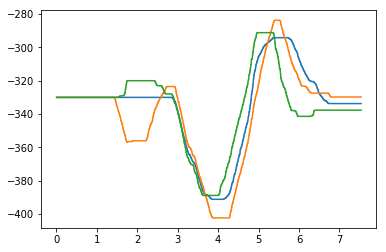

In [24]:
from matplotlib import pyplot as plt
plt.plot(T,top, label = 'top')
plt.plot(T,middle, label='middle')
plt.plot(T,bottom, label = 'bottom')

In [27]:
r.disk_bottom.compliant = False
r.disk_middle.compliant = False
r.disk_top.compliant = False

for i in range(len(move)):
    r.disk_top.target_rot_position = move[i][0]
    r.disk_middle.target_rot_position = move[i][1]
    r.disk_bottom.target_rot_position = move[i][2]
    time.sleep(0.005)